For the data import and preparation we will make use of the *pandas* package

In [1]:
import pandas as pd
data = pd.read_csv('data/SoilMoistureData.csv')
# lets see how the first entries and the heading of the data looks like:
data.head()

Date Time  Box17_Moist5 [%]  Box17_Moist6 [%]  Box17_Voltage [mV]
0  2021-01-01 00:09:07           15.0577           23.4297              3406.0
1  2021-01-01 00:18:55           15.0577           23.4319              3406.0
2  2021-01-01 00:28:42           15.0577           23.3431              3407.0
3  2021-01-01 00:38:30           15.0267           23.4764              3407.0
4  2021-01-01 00:48:18           15.0577           23.3431              3407.0

* cast data index to date time (required for saqc applycation)

In [2]:
# setting new index column
data = data.set_index('Date Time')
# casting the new indexe type to Datetime
data.index = pd.DatetimeIndex(data.index)
# checking out the leading entries:
data.head()

Box17_Moist5 [%]  Box17_Moist6 [%]  Box17_Voltage [mV]
Date Time                                                                  
2021-01-01 00:09:07           15.0577           23.4297              3406.0
2021-01-01 00:18:55           15.0577           23.4319              3406.0
2021-01-01 00:28:42           15.0577           23.3431              3407.0
2021-01-01 00:38:30           15.0267           23.4764              3407.0
2021-01-01 00:48:18           15.0577           23.3431              3407.0

Now lets generate an *SaQC* object from the data. Therefor we import the *saqc* package and instantiate an object of the class *saqc.SaQC*. The newly generated object *qc* will not only carry the data but also have a synchronous "mirror" tabular, containing the current state of quality flags for every datapoint of the initial data:

In [3]:
import saqc
qc = saqc.SaQC(data)
qc.data

                    Box17_Moist5 [%] |                     Box17_Moist6 [%] |                     Box17_Voltage [mV] | 
==================================== | ==================================== | ====================================== | 
Date Time                            | Date Time                            | Date Time                              | 
2021-01-01 00:09:07          15.0577 | 2021-01-01 00:09:07          23.4297 | 2021-01-01 00:09:07             3406.0 | 
2021-01-01 00:18:55          15.0577 | 2021-01-01 00:18:55          23.4319 | 2021-01-01 00:18:55             3406.0 | 
2021-01-01 00:28:42          15.0577 | 2021-01-01 00:28:42          23.3431 | 2021-01-01 00:28:42             3407.0 | 
2021-01-01 00:38:30          15.0267 | 2021-01-01 00:38:30          23.4764 | 2021-01-01 00:38:30             3407.0 | 
2021-01-01 00:48:18          15.0577 | 2021-01-01 00:48:18          23.3431 | 2021-01-01 00:48:18             3407.0 | 
...                              ... | .

In [4]:
qc.flags

                    Box17_Moist5 [%] |                     Box17_Moist6 [%] |                     Box17_Voltage [mV] | 
==================================== | ==================================== | ====================================== | 
Date Time                            | Date Time                            | Date Time                              | 
2021-01-01 00:09:07             -inf | 2021-01-01 00:09:07             -inf | 2021-01-01 00:09:07               -inf | 
2021-01-01 00:18:55             -inf | 2021-01-01 00:18:55             -inf | 2021-01-01 00:18:55               -inf | 
2021-01-01 00:28:42             -inf | 2021-01-01 00:28:42             -inf | 2021-01-01 00:28:42               -inf | 
2021-01-01 00:38:30             -inf | 2021-01-01 00:38:30             -inf | 2021-01-01 00:38:30               -inf | 
2021-01-01 00:48:18             -inf | 2021-01-01 00:48:18             -inf | 2021-01-01 00:48:18               -inf | 
...                              ... | .

All the flags evaluate to *-inf* - wich is the representation of the *unflagged* status. Since we didnt do anything with the data yet, this is as expected. Lets get a visual impression of the data set to check it for something that may have to be flagged:

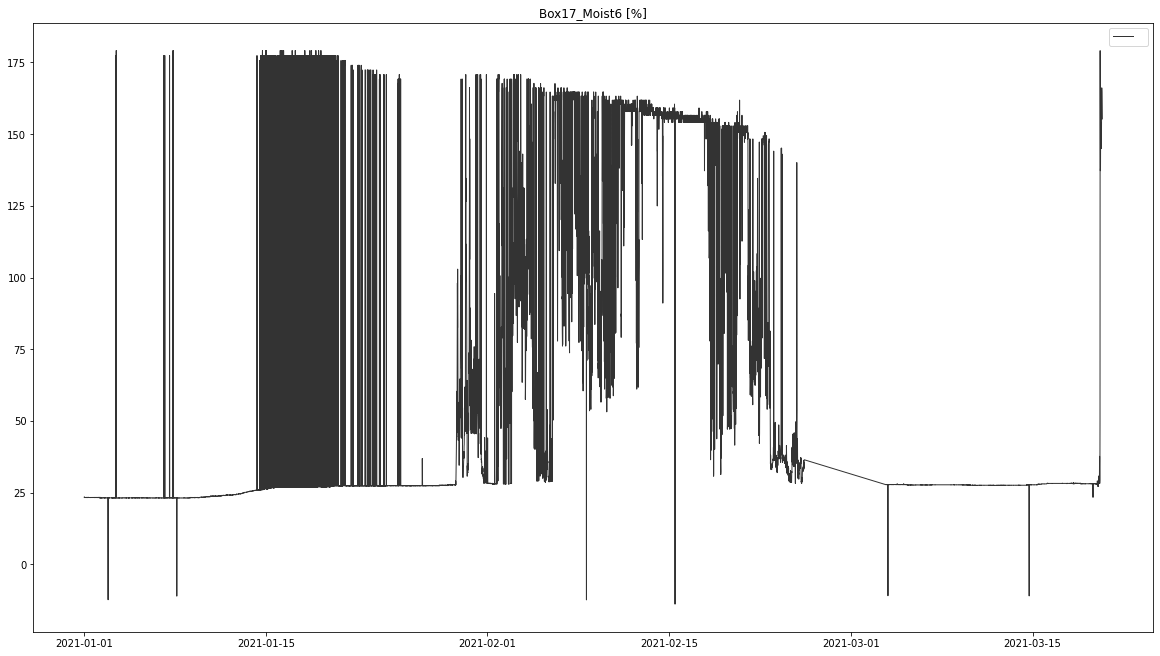

In [5]:
# this plots the soil moisture measurements
qc.plot('Box17_Moist6 [%]', dfilter=saqc.constants.FILTER_NONE)

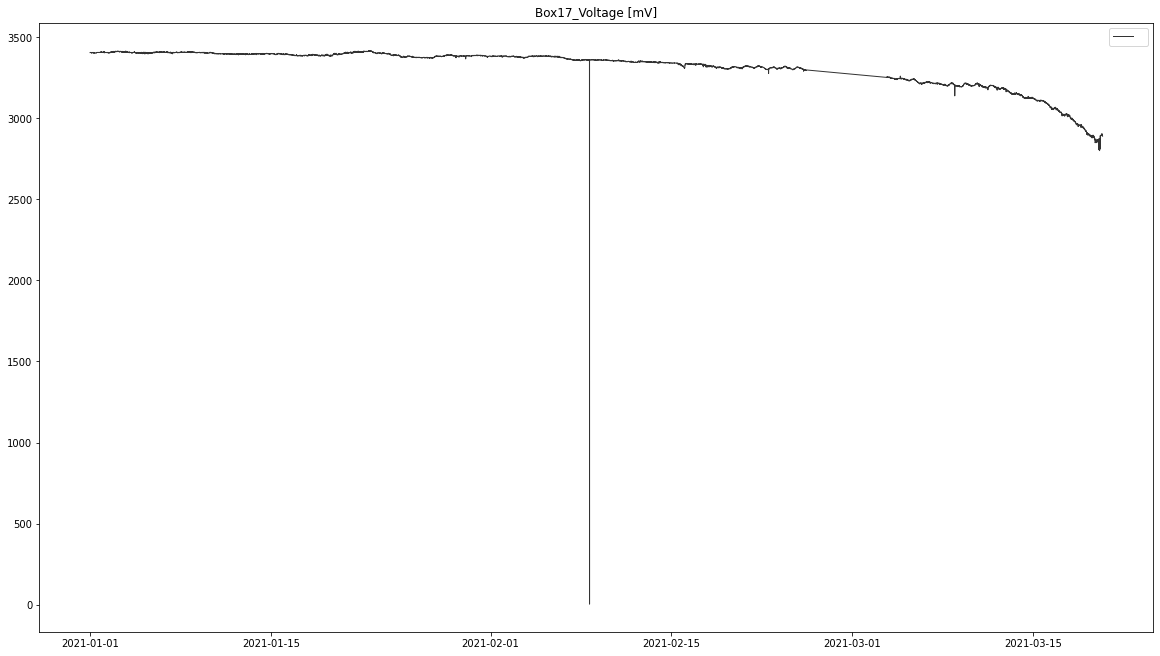

In [6]:
# this plots the batery voltage
qc.plot('Box17_Voltage [mV]', dfilter=saqc.constants.FILTER_NONE)

So, soilmoisture meassurements obveously contain distortions and anomalies. Also the battery voltage shows some irregular behavior, by dropping to near zero once, and also, by falling of in mean voltage steadily. Lets say, we consider a battery voltage level below *3000* mV not trustworthy. To mark those too low voltage values. We can applying a simple cutoff test, via the *flagRange* method of the *qc* object. This will set flags, where data exceeds a certain barrier, that is controlled by its *min* and *max* parameters. The application of the method returns a new saqc object, that reflects the result of the methods application:

In [7]:
qc = qc.flagRange(field='Box17_Voltage [mV]', min=3000)

Since the tabular representation of the data is somewhat hard to overlook with its many entries, lets check the results visually, again, with the *.plot* method. It will now show the flags, together with the data:

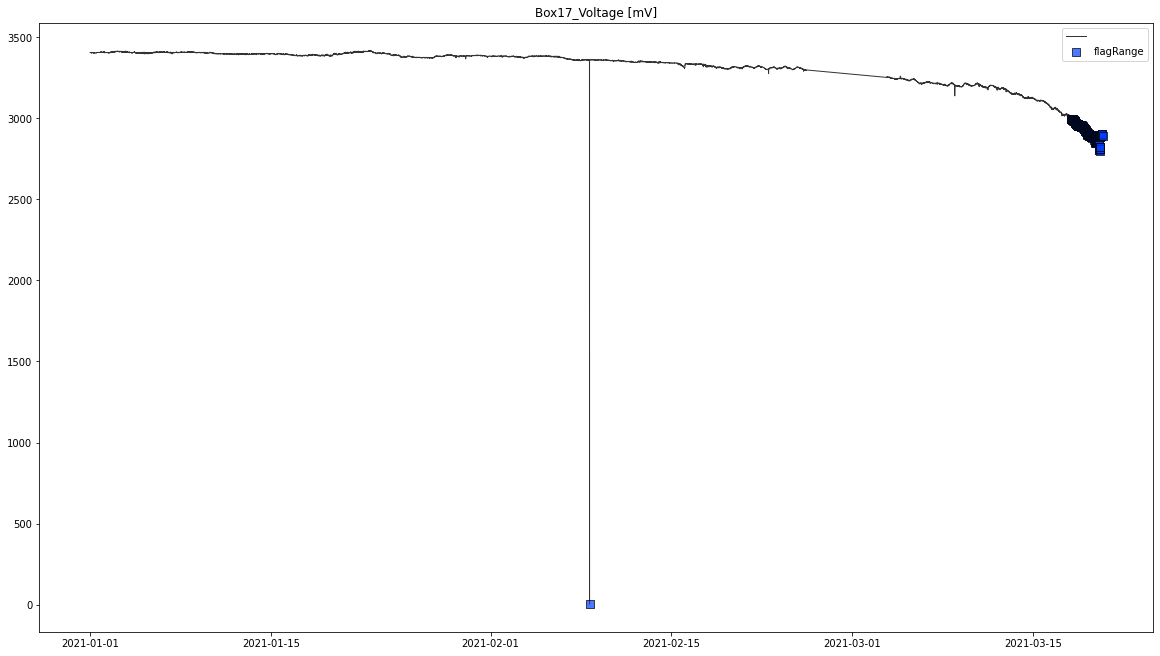

In [8]:
qc.plot('Box17_Voltage [mV]',  dfilter=saqc.constants.FILTER_NONE)

When not operating in an interactive frontend mode, the pictures cant be zoomed. To generate zoomed in pictures, one can control the range plotted, via the *xscope* keyword of the *.plot()* method.

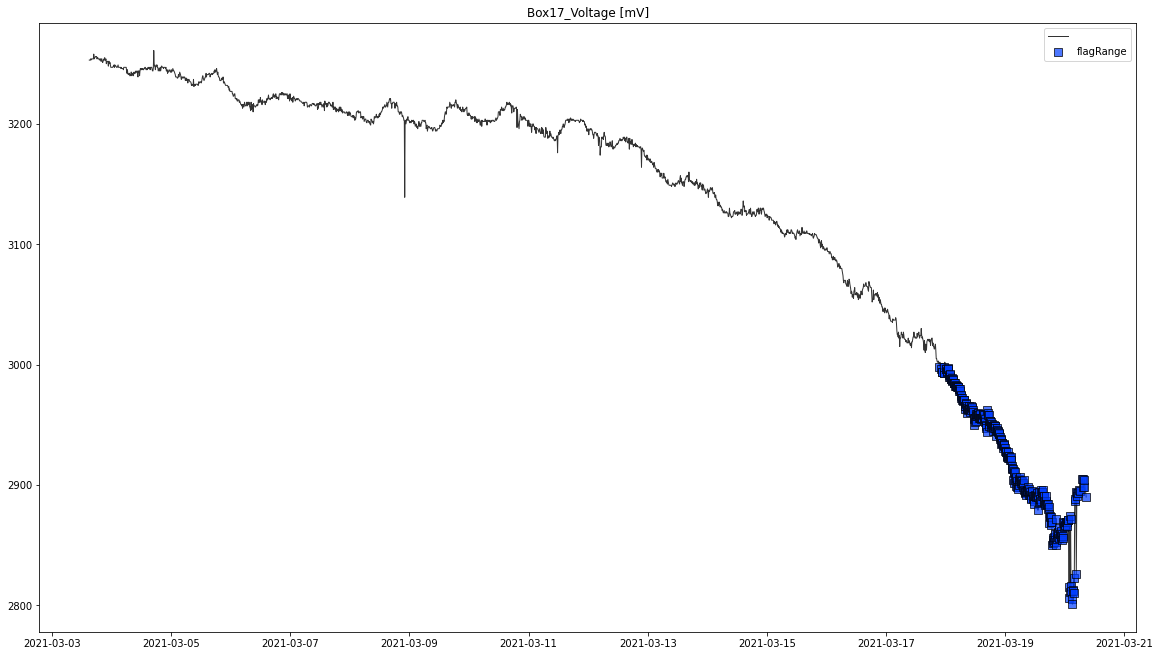

In [9]:
qc.plot('Box17_Voltage [mV]', xscope='2021-03',  dfilter=saqc.constants.FILTER_NONE)

As expected, all data below the *3000* mV threshold got assigned a flag, associated with the *flagRangeTest*. We can also check out the values of the flags set, by having a look at the flags tabular:

In [10]:
qc.flags

                    Box17_Moist5 [%] |                     Box17_Moist6 [%] |                     Box17_Voltage [mV] | 
==================================== | ==================================== | ====================================== | 
Date Time                            | Date Time                            | Date Time                              | 
2021-01-01 00:09:07             -inf | 2021-01-01 00:09:07             -inf | 2021-01-01 00:09:07               -inf | 
2021-01-01 00:18:55             -inf | 2021-01-01 00:18:55             -inf | 2021-01-01 00:18:55               -inf | 
2021-01-01 00:28:42             -inf | 2021-01-01 00:28:42             -inf | 2021-01-01 00:28:42               -inf | 
2021-01-01 00:38:30             -inf | 2021-01-01 00:38:30             -inf | 2021-01-01 00:38:30               -inf | 
2021-01-01 00:48:18             -inf | 2021-01-01 00:48:18             -inf | 2021-01-01 00:48:18               -inf | 
...                              ... | .

As we can see, the last entries of the battery variable now evaluate to the float *255* - wich is the representation of the worst flag possible (that is assigned by any test by default). But what we actually want, is, to transfer our knowledge of the voltage level being not trustworthy, to the actual soil moisture measurements. Since both variables share the same index, we can easily do that with the *transferFlags* method. By that, we assign all soilmoisture data points where we dont trust the batery measurements, a *BAD* flag. We will also assign a *label* to this flag, to later on have an easier time distinguishing the different flags origins:

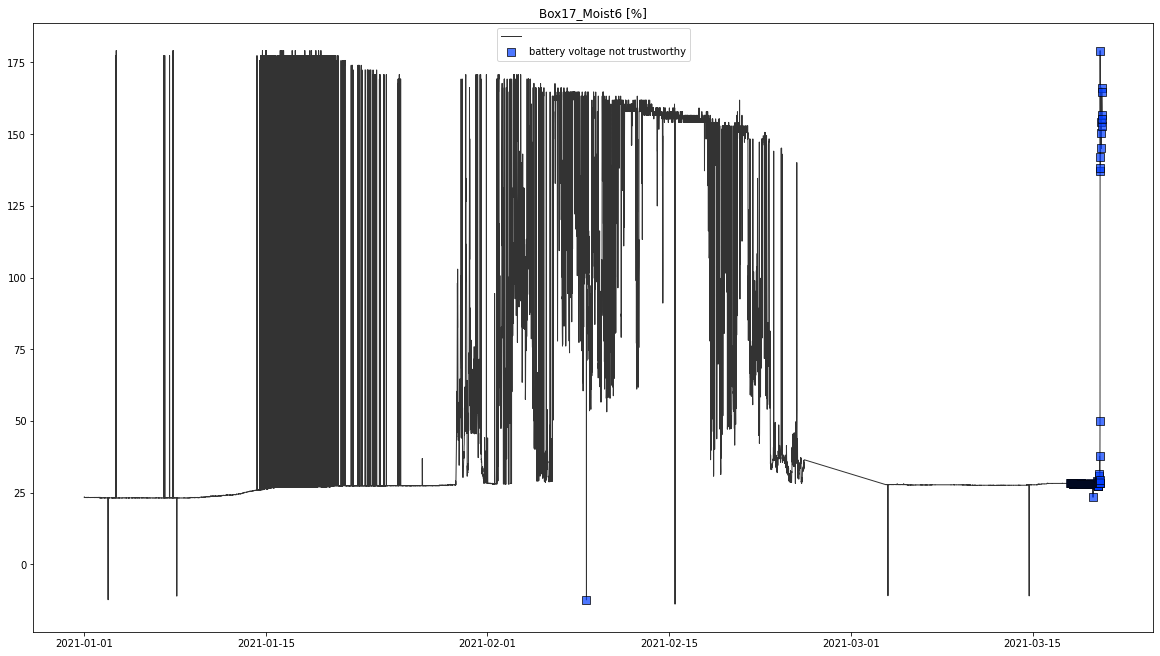

In [11]:
qc = qc.transferFlags('Box17_Voltage [mV]', 'Box17_Moist6 [%]', label='battery voltage not trustworthy')
# we briefly check out the results:
qc.plot('Box17_Moist6 [%]',  dfilter=saqc.constants.FILTER_NONE)

So the battery voltage can explain some, but very few of the anomalies. Note, how the plots legend now doesnt show the name of the test the flag originated from, but the *label* string we assigned it.
Lets now apply some more knowledge we have of the variable in question, wich is soil moisture. Obveously, as a variable of unit *%*, it should evaluate somewhere in between *0* and *100*. We could apply another range test to the data, via:
```python
qc = qc.flagRange('Box17_Moist6 [%]', min=0, max=100, label='data out of range')
```
An equivalent result can be achieved, by applying the more general *flagGeneric* function, wich is a method, that allows for the composition of custom flagging conditions, that can depend on any number of the variables hold by the saqc object. The condition we want to compose is just, that we want to flag those values, that exceed *100* or *0*. conditions have to be formulated as functions of the variables, so the condition we want to apply, would be:   

In [12]:
condition = lambda x: (x<0) | (x>100)

We can just pass on the condition to the function parameter of *flagGeneric*

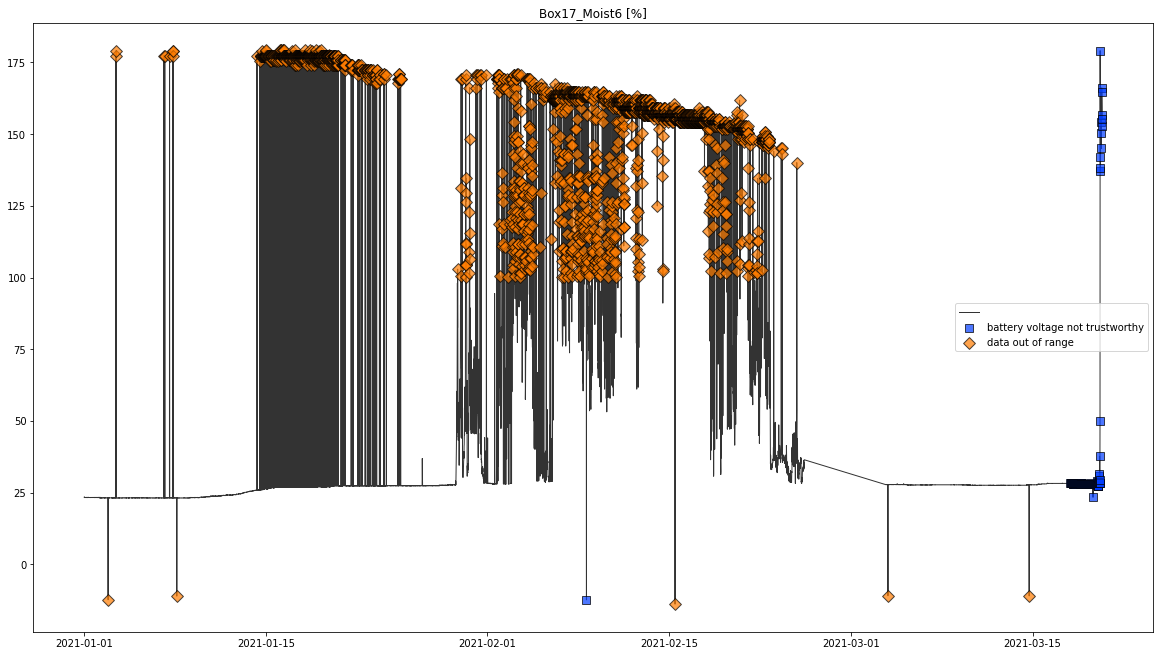

In [13]:
qc = qc.flagGeneric('Box17_Moist6 [%]', func=condition, label='data out of range')
qc.plot('Box17_Moist6 [%]',  dfilter=saqc.constants.FILTER_NONE)

To see a picture of the data that is cleared cleared by all the flagged data points, we can make use of the the *dfilter* keyword. 
This keyword is implemented by all the saqc methods, and controlls, up to wich flagging level datapoints are passed on to the method. For the *.plot* method, the *dfilter* defaults to filtering nothing - since the method is supposed to show the flagged data values flagging levels. 
But to remove the flagged values from the plot, we can change the *dfilter* level to *BAD* - wich results in the *BAD* flagged values not being displayed. As mentioned above, the internal representation for *BAD* flags is a certain float (255). But we actually can just import the *BAD* constant from the *saqc* package without having to care about its actual value:

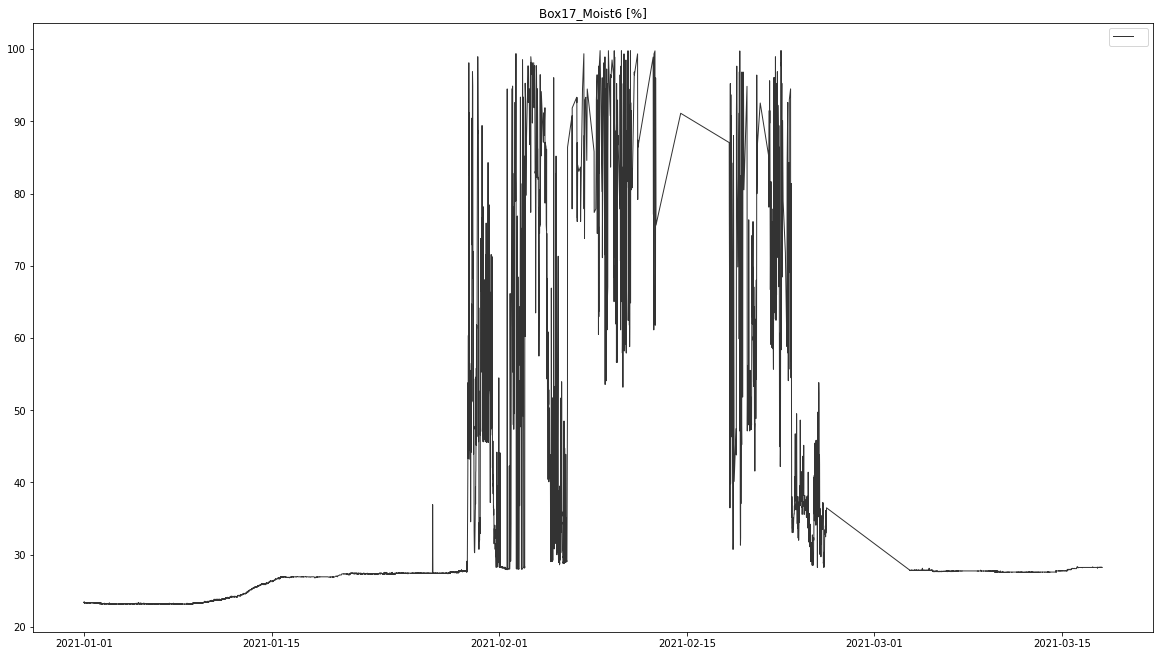

In [14]:
from saqc.constants import BAD
qc.plot('Box17_Moist6 [%]', dfilter=BAD)

Now lets find a way to somehow limit the noisy-nes of the data. An easy and basic way of doing so, is, to limit the variance, the data curve is allowed to exhibit. 
Therefor we first measure the variance the data has with in a rolling window of 1 day size and generate a new variable, holding the calculation results. 
For the variance calculations, we use *pandas* rolling method. 
To apply arbitrary processing functions on the data, we can use the *processGeneric* method. We write the results to a new variable, determined by the *target* parameter. 

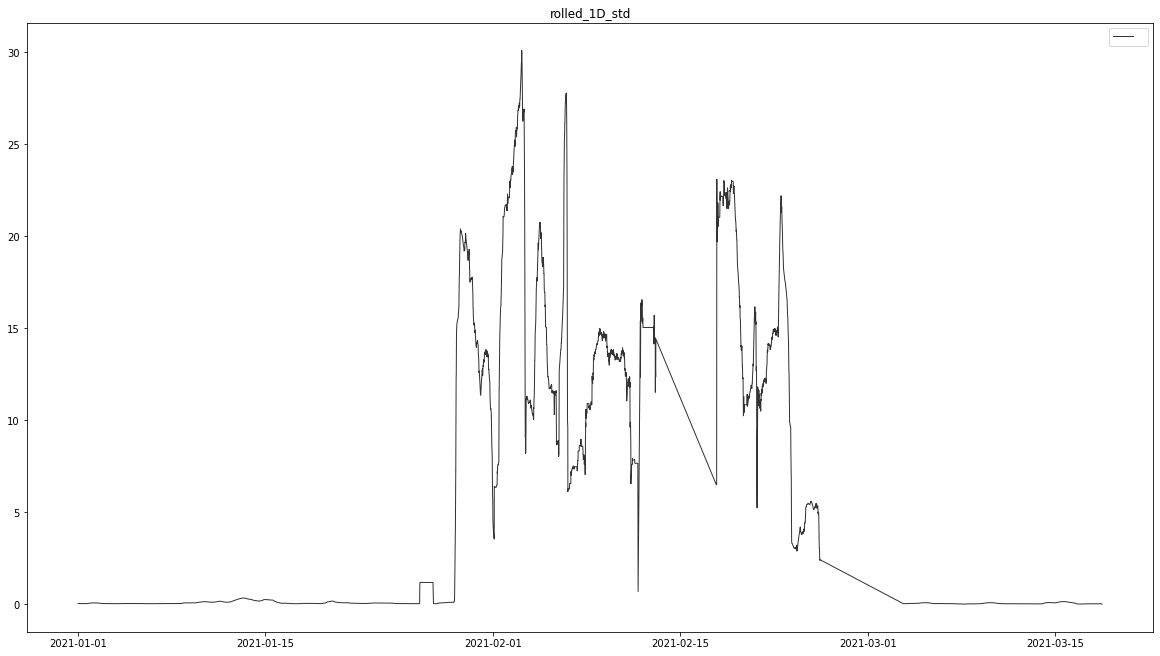

In [15]:
qc = qc.processGeneric('Box17_Moist6 [%]', target='rolled_1D_std', func=lambda x:x.rolling('1D', center=True).std())
qc.plot('rolled_1D_std',  dfilter=saqc.constants.FILTER_NONE)

Lets set the cutoff point for the variance the data is allowed to exhibit in one day, to *2*.
Lets therefor again, make use of the *flagGeneric* function, we set the target for the flagging to be the Soilmoisture measurements:

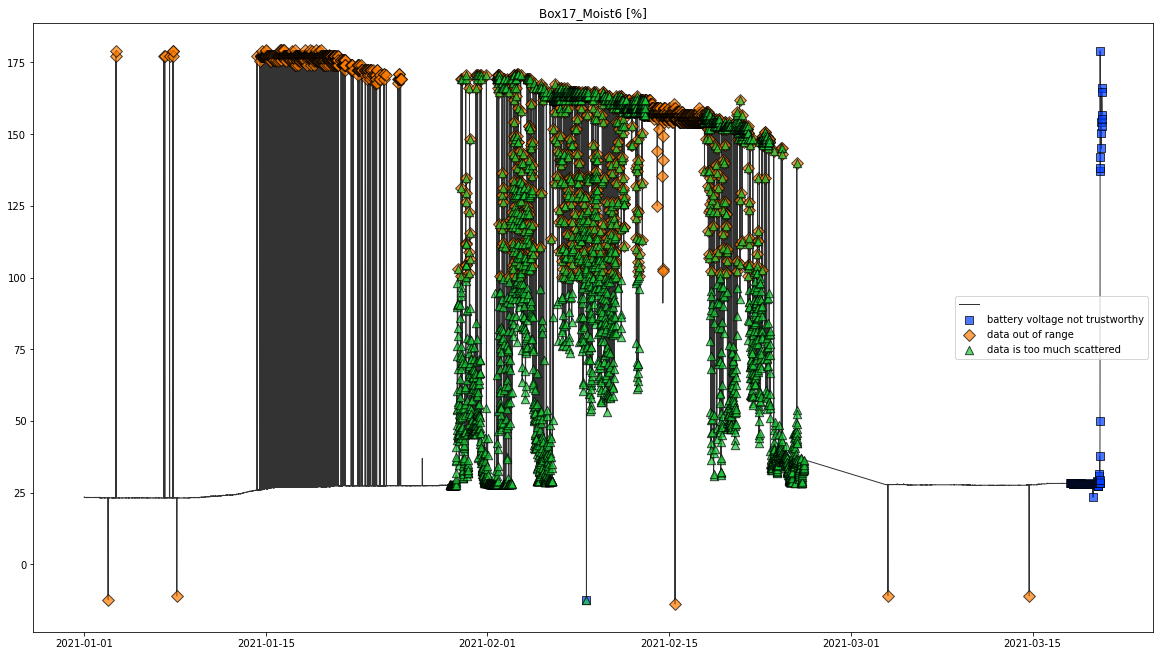

In [16]:
qc = qc.flagGeneric('rolled_1D_std', target='Box17_Moist6 [%]', func=lambda x: x>2, label='data is too much scattered')
qc.plot('Box17_Moist6 [%]',  dfilter=saqc.constants.FILTER_NONE)

Checking out the result cleared from flagged data reveals, there is one isolated data point left, that wasnt catched by preveaous tests. To flag data points or groups of datapoints, tha we dont trust because they are surrounded only by invalid or missing data, we can make use of the *flagIsolated* method.

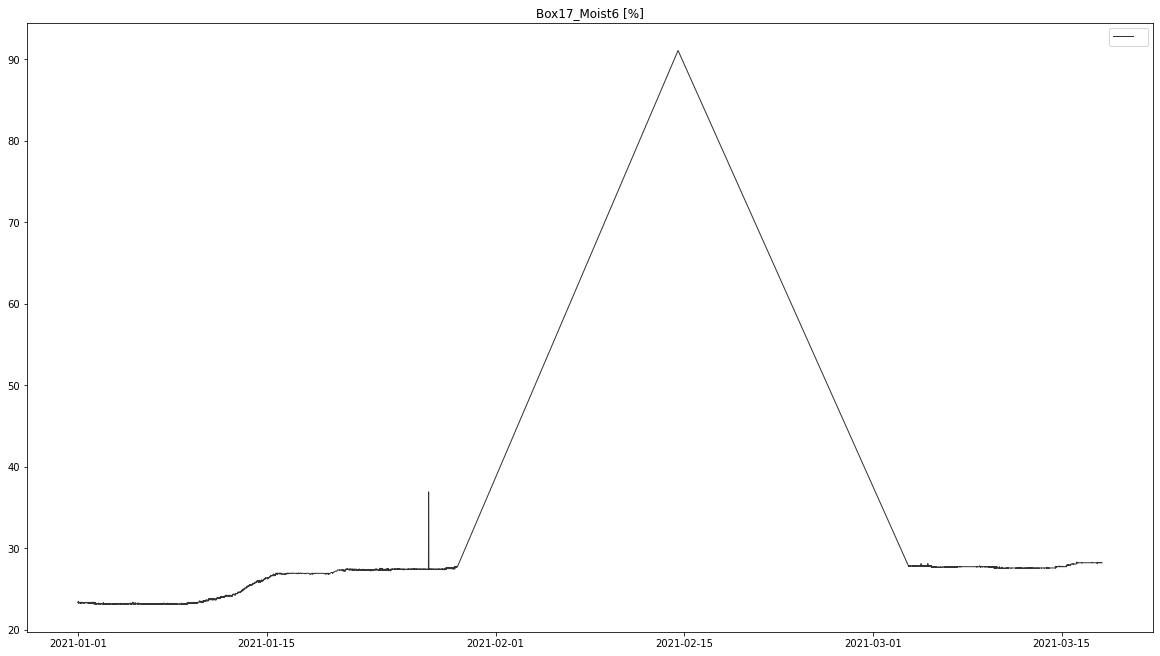

In [17]:
qc.plot('Box17_Moist6 [%]', dfilter=BAD)

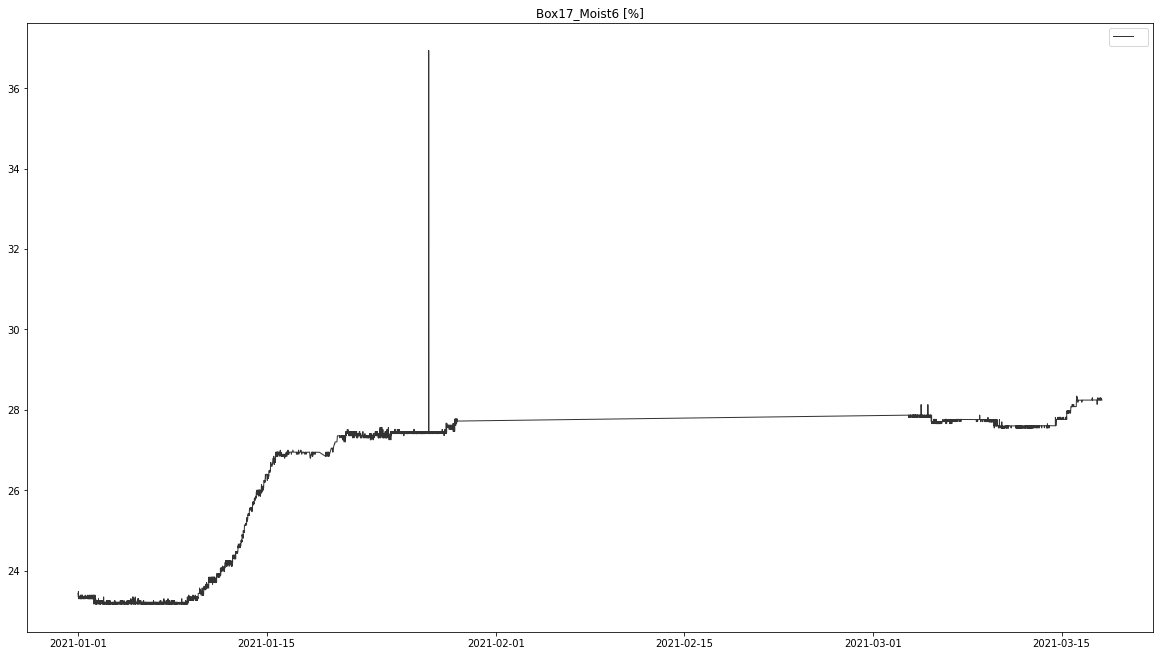

In [18]:
qc = qc.flagIsolated('Box17_Moist6 [%]', group_window='1h', gap_window='1h')
qc.plot('Box17_Moist6 [%]', dfilter=BAD)

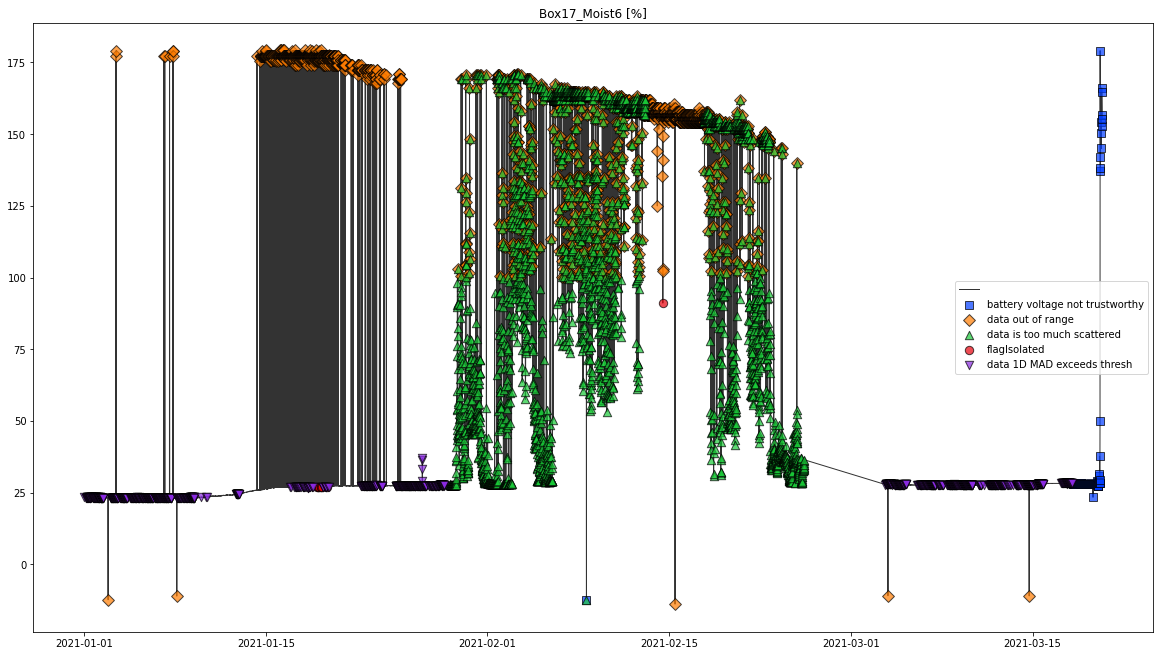

In [19]:
# try flagging the outlier with the MAD method
qc = qc.flagMAD('Box17_Moist6 [%]', '1D', label='data 1D MAD exceeds thresh')
qc.plot('Box17_Moist6 [%]',  dfilter=saqc.constants.FILTER_NONE)

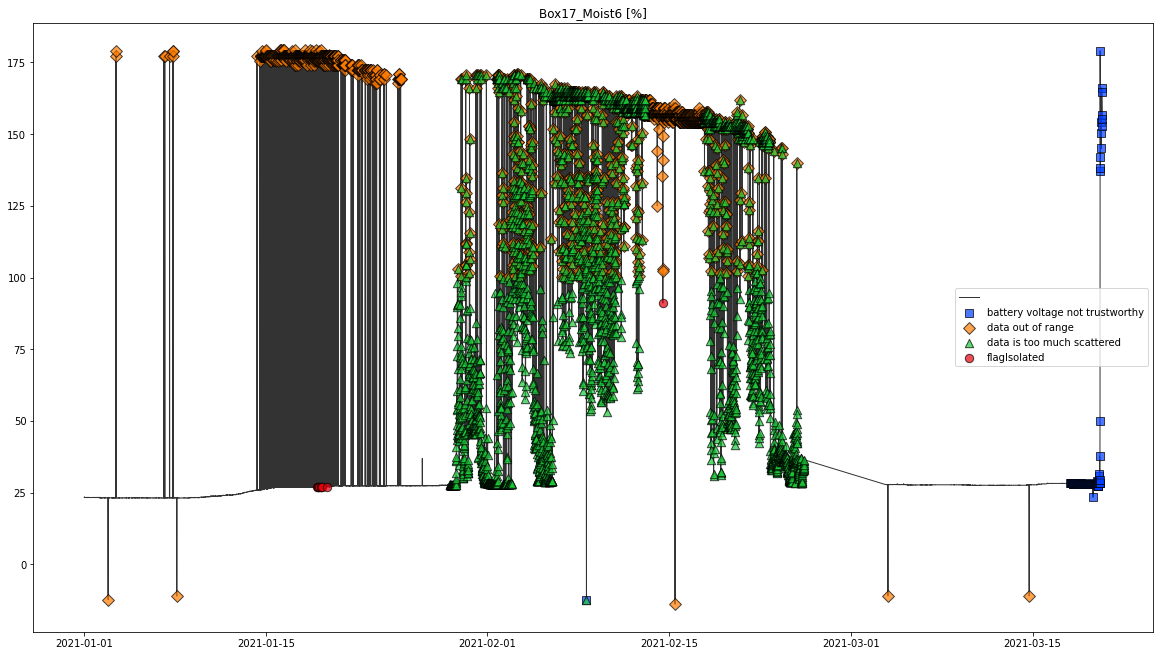

In [20]:
# removing the MAD flag again, since t overflagged
from saqc.constants import UNFLAGGED
qc = qc.flagGeneric('Box17_Moist6 [%]', func=lambda x: isflagged(x, 'data 1D MAD exceeds thresh'), flag=UNFLAGGED)
qc.plot('Box17_Moist6 [%]',  dfilter=saqc.constants.FILTER_NONE)

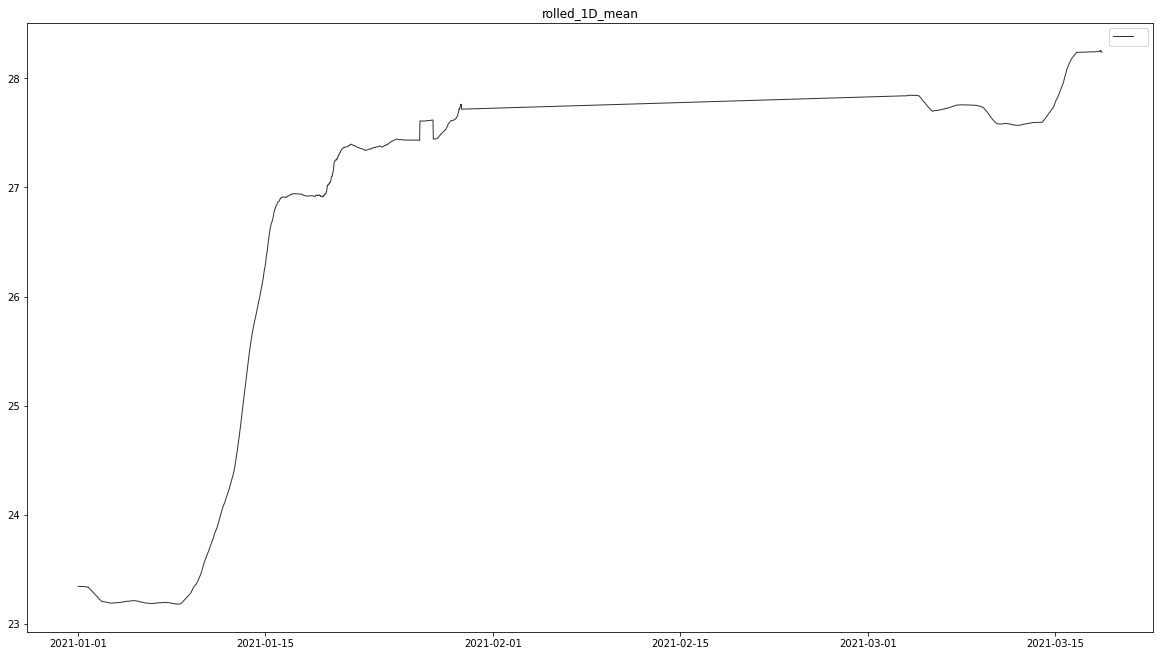

In [21]:
# trying some more elaborated outlier detection
qc = qc.processGeneric('Box17_Moist6 [%]', target='rolled_1D_mean', func=lambda x: x.rolling('1D', center=True).mean())
qc.plot('rolled_1D_mean',  dfilter=saqc.constants.FILTER_NONE)

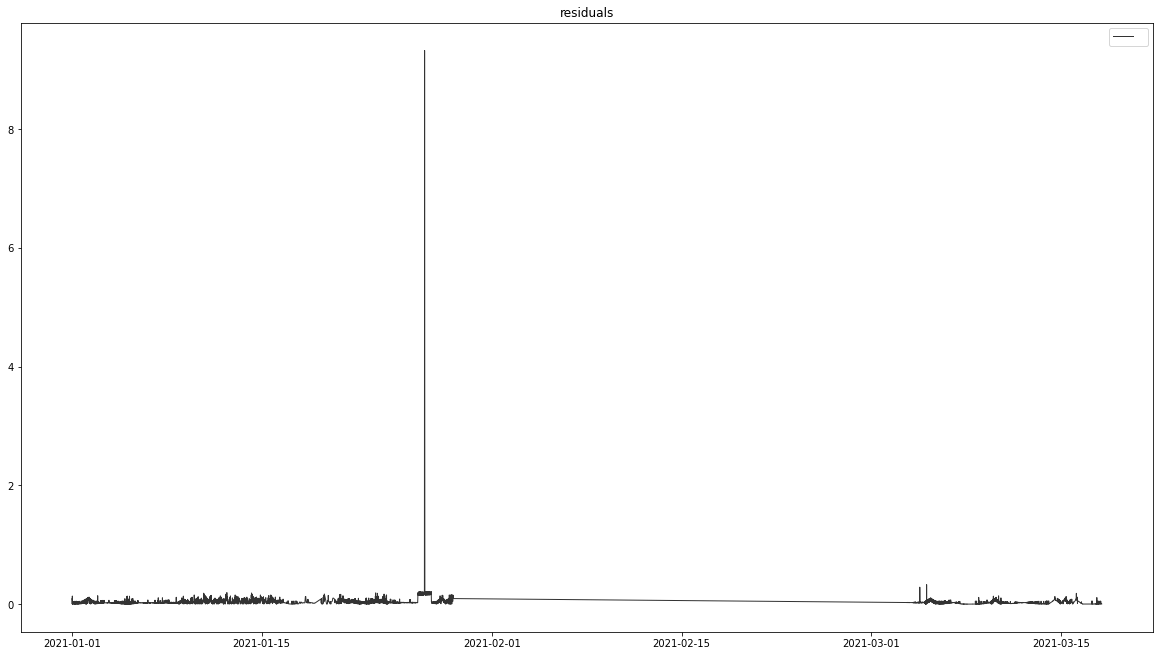

In [22]:
qc = qc.processGeneric(['Box17_Moist6 [%]', 'rolled_1D_mean', 'rolled_1D_std'], target='Z-score', func=lambda x,y,z: (x - y).abs()/z)
qc = qc.processGeneric(['Box17_Moist6 [%]', 'rolled_1D_mean'], target='residuals', func=lambda x,y: (x-y).abs())
qc.plot('residuals',  dfilter=saqc.constants.FILTER_NONE)

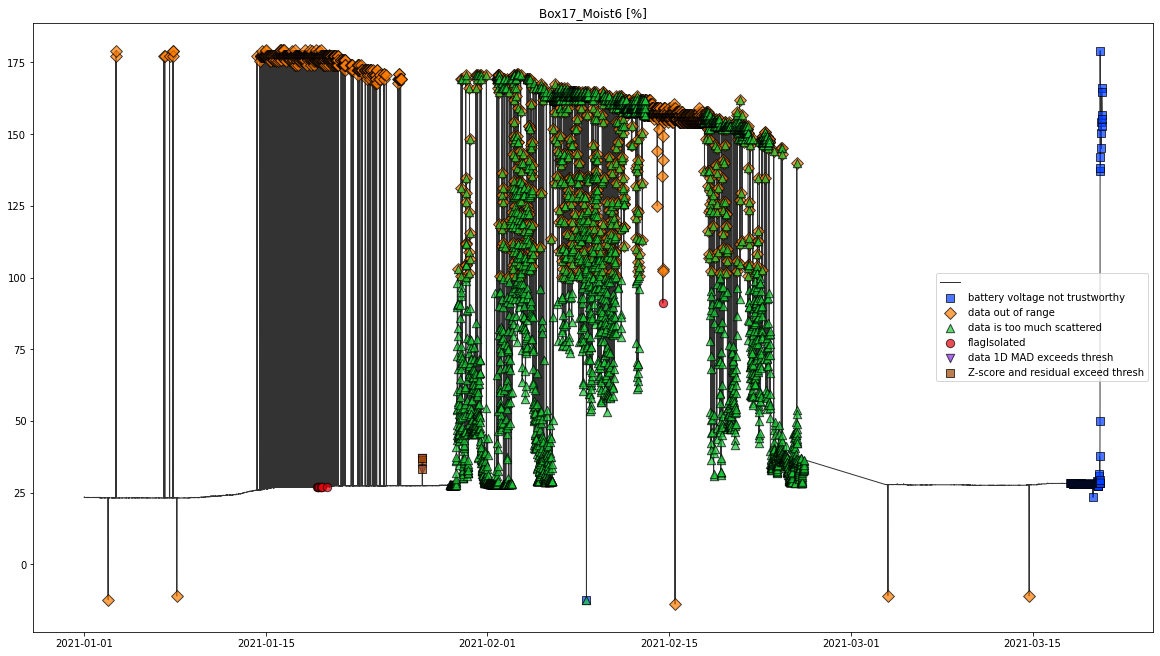

In [23]:
qc = qc.flagGeneric(['Z-score', 'residuals'], target='Box17_Moist6 [%]', func=lambda x,y: (x>3) & (y >2), label='Z-score and residual exceed thresh')
qc.plot('Box17_Moist6 [%]',  dfilter=saqc.constants.FILTER_NONE)

In [24]:
#qc = qc.concatFlags('Box17_Moist6 [%]', 'Box17_Moist6 [%]_original', freq='10min', method='inverse_interpolation')
#qc.plot('Box17_Moist6 [%]_original')